# Polynomial Regression: Predicting Property Sales Prices of King County Housing Properties
##### This code uses King Country housing data to train a Polynomial Regression model.
##### We then tested the model's performance on a test subset of the King County Housing Data.

###### We referenced parts of the following article to assist us with building the model: https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

## Import necessary libraries, read in input csv, and perform additional clean-up on input data

In [1]:
# Import necesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [2]:
# Read in King County housing data
kc_house_prices = pd.read_csv("../Input_Data/kc_house_data_clean.csv")
kc_house_prices.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Create separate dataset consisting of house price features and view summary statistics
kc_housing_features = kc_house_prices.drop(columns=["price", "date"])
features_stat_overview = kc_housing_features.describe()
features_stat_overview

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Creating testing and training X (features) and y (target) datasets

In [4]:
# Create features X dataset
X = kc_housing_features.copy()
X = np.array(X)
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [5]:
# Create target y dataset
y = np.array(kc_house_prices["price"])
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [6]:
# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

# Take a quick look at the size of the train and test datasets
print(f"Size of training features dataset: {(X_train.shape)}")
print(f"Size of training target dataset: {(y_train.shape)}")
print(f"Size of testing features dataset: {(X_test.shape)}")
print(f"Size of testing target dataset: {(y_test.shape)}")

Size of training features dataset: (16209, 18)
Size of training target dataset: (16209,)
Size of testing features dataset: (5404, 18)
Size of testing target dataset: (5404,)


## Scale Features & Train Polynomial Regression Model

In [7]:
# Scale features datasets
poly_reg = PolynomialFeatures(degree=3)
X_train_scaled = poly_reg.fit_transform(X_train)
X_test_scaled = poly_reg.fit_transform(X_test)

# Initiate model
polynomial_reg = LinearRegression()

In [8]:
# Fit model
polynomial_reg.fit(X_train_scaled, y_train)

LinearRegression()

## Make Predictions on Testing and Training Data

In [9]:
# Make out-of-sample predictions with testing dataset
predictions = polynomial_reg.predict(X_test_scaled)

# Make in-sample predictions with training dataset
in_predictions = polynomial_reg.predict(X_train_scaled)

## Produce Model Performance Metrics

In [10]:
# Out-of-sample Performance
r2_score = round(100 * metrics.r2_score(y_test, predictions),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2)
mae = round(metrics.mean_absolute_error(y_test, predictions),2)
mape = round((100 * metrics.mean_absolute_percentage_error(y_test, predictions)),2)
accuracy = (100 - mape)

# In-Sample Performance
in_predictions = polynomial_reg.predict(X_train_scaled)
in_r2_score = round(100 * metrics.r2_score(y_train, in_predictions),2)
in_rmse = round(np.sqrt(metrics.mean_squared_error(y_train, in_predictions)),2)
in_mae = round(metrics.mean_absolute_error(y_train, in_predictions),2)
in_mape = round((100 * metrics.mean_absolute_percentage_error(y_train, in_predictions)),2)
in_accuracy = (100 - in_mape)

In [11]:
# Print model performance metrics
print(f"Polynomial Regression Out-of-Sample Results, All Features:")
print(f"Polynomial Regression Out-of-Sample R2 Score: {r2_score}%")
print(f"Polynomial Regression Out-of-Sample Root Mean Squared Error: ${rmse}")
print(f"Polynomial Regression Out-of-Sample Mean Absolute Error: ${mae}")
print(f"Polynomial Regression Out-of-Sample Mean Absolute Percentage Error: {mape}%")
print(f"Polynomial Regression Out-of-Sample Accuracy: {accuracy}%", '\n')

print(f"Polynomial Regression In-Sample Results, All Features:")
print(f"Polynomial Regression In-Sample R2 Score: {in_r2_score}%")
print(f"Polynomial Regression In-Sample Root Mean Squared Error: ${in_rmse}")
print(f"Polynomial Regression In-Sample Mean Absolute Error: ${in_mae}")
print(f"Polynomial Regression In-Sample Mean Absolute Percentage Error: {in_mape}%")
print(f"Polynomial Regression In-Sample Accuracy: {in_accuracy}%")

# Save performance metrics to text file
# Source: https://stackoverflow.com/questions/36571560/directing-print-output-to-a-txt-file
with open("../Regression_Metrics/poly_reg_performance_all_features.txt", "w") as file:
    print(f"Polynomial Regression Out-of-Sample Results, All Features:", '\n', file=file)
    print(f"Polynomial Regression Out-of-Sample R2 Score: {r2_score}%", file=file)
    print(f"Polynomial Regression Out-of-Sample Root Mean Squared Error: ${rmse}", file=file)
    print(f"Polynomial Regression Out-of-Sample Mean Absolute Error: ${mae}", file=file)
    print(f"Polynomial Regression Out-of-Sample Mean Absolute Percentage Error: {mape}%", file=file)
    print(f"Polynomial Regression Out-of-Sample Accuracy: {accuracy}%", '\n', file=file)
    print(f"Polynomial Regression In-Sample Results, All Features:", '\n', file=file)
    print(f"Polynomial Regression In-Sample R2 Score: {in_r2_score}%", file=file)
    print(f"Polynomial Regression In-Sample Root Mean Squared Error: ${in_rmse}", file=file)
    print(f"Polynomial Regression In-Sample Mean Absolute Error: ${in_mae}", file=file)
    print(f"Polynomial Regression In-Sample Mean Absolute Percentage Error: {in_mape}%", file=file)
    print(f"Polynomial Regression In-Sample Accuracy: {in_accuracy}%", file=file)

Polynomial Regression Out-of-Sample Results, All Features:
Polynomial Regression Out-of-Sample R2 Score: 31.71%
Polynomial Regression Out-of-Sample Root Mean Squared Error: $287906.7
Polynomial Regression Out-of-Sample Mean Absolute Error: $105233.12
Polynomial Regression Out-of-Sample Mean Absolute Percentage Error: 21.08%
Polynomial Regression Out-of-Sample Accuracy: 78.92% 

Polynomial Regression In-Sample Results, All Features:
Polynomial Regression In-Sample R2 Score: 88.04%
Polynomial Regression In-Sample Root Mean Squared Error: $129059.96
Polynomial Regression In-Sample Mean Absolute Error: $88075.1
Polynomial Regression In-Sample Mean Absolute Percentage Error: 18.49%
Polynomial Regression In-Sample Accuracy: 81.51%


# Part Two: Refine Predictive Features & Re-Run Model

## Remove features that show minimal correlation to sales price

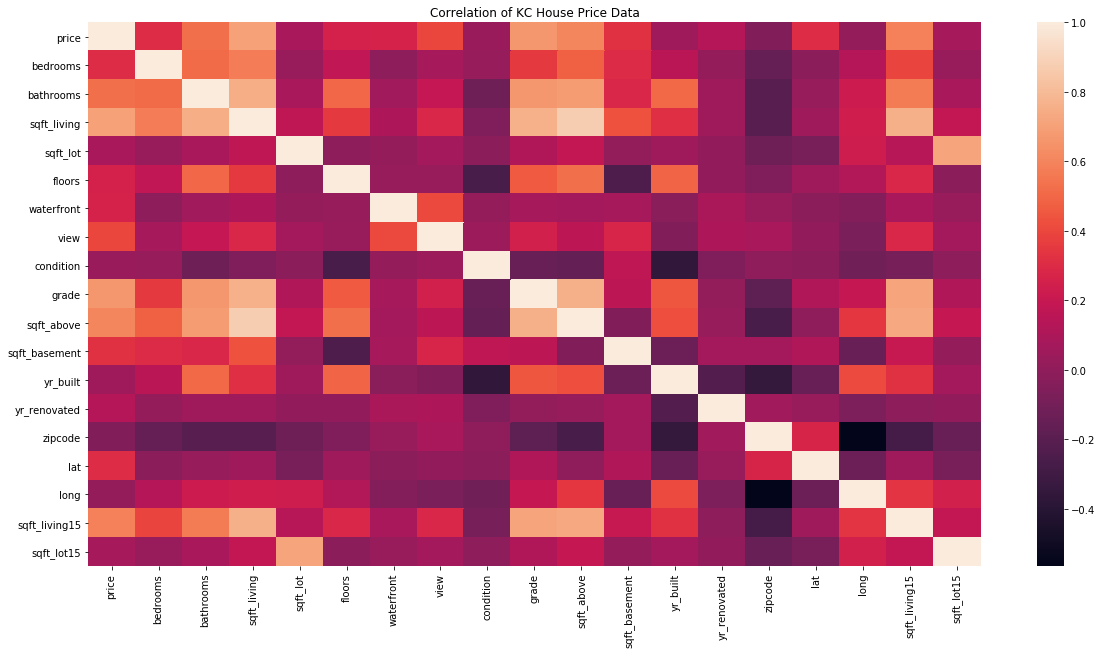

In [12]:
# Plot correlation of dataset variables to identify variables that best correlate with the sale price
kc_housing_corr = kc_house_prices.corr()
fig, ax = plt.subplots(figsize=(20,10))
plt.title("Correlation of KC House Price Data")
sns.heatmap(kc_housing_corr, ax=ax)
plt.savefig("../Images/kc_housing_corr.png")

In [13]:
# Rank features by correlation with price
price_corr_ranked = kc_housing_corr.head(1).transpose().sort_values(by=["price"], ascending=False)
price_corr_ranked

,price
price,1.000000
sqft_living,0.702035
grade,0.667434
sqft_above,0.605567
sqft_living15,0.585379
bathrooms,0.525138
view,0.397293
sqft_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [14]:
# Remove 6 features with weakest correlation to price and "date" field
refined_features = kc_housing_features.drop(columns=["zipcode", "long", "condition", "yr_built", "sqft_lot15", "sqft_lot"])
refined_features.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,0,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,400,1991,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,0,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,910,0,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,0,0,47.6168,1800


## Create new testing and training datasets, scale features datasets, & re-fit model

In [15]:
# Create new features X dataset
X = refined_features.copy()
X = np.array(X)

# Split into new training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

poly_reg = PolynomialFeatures(degree=3)
X_train_scaled = poly_reg.fit_transform(X_train)
X_test_scaled = poly_reg.fit_transform(X_test)
polynomial_reg = LinearRegression()

polynomial_reg.fit(X_train_scaled, y_train)

LinearRegression()

## Make Predictions on Refined Testing and Training Data

In [16]:
# Make out-of-sample predictions with refined testing dataset
predictions_refined = polynomial_reg.predict(X_test_scaled)

# Make in-sample predictions with refined training dataset
in_predictions_refined = polynomial_reg.predict(X_train_scaled)

## Produce Model Performance Metrics - Refined Features

In [17]:
# Out-of-sample Performance
r2_score_refined = round(100 * metrics.r2_score(y_test, predictions_refined),2)
rmse_refined = round(np.sqrt(metrics.mean_squared_error(y_test, predictions_refined)),2)
mae_refined = round(metrics.mean_absolute_error(y_test, predictions_refined),2)
mape_refined = round((100 * metrics.mean_absolute_percentage_error(y_test, predictions_refined)),2)
accuracy_refined = (100 - mape_refined)

# In-Sample Performance
in_r2_score_refined = round(100 * metrics.r2_score(y_train, in_predictions_refined),2)
in_rmse_refined = round(np.sqrt(metrics.mean_squared_error(y_train, in_predictions_refined)),2)
in_mae_refined = round(metrics.mean_absolute_error(y_train, in_predictions_refined),2)
in_mape_refined = round((100 * metrics.mean_absolute_percentage_error(y_train, in_predictions_refined)),2)
in_accuracy_refined = (100 - in_mape_refined)

In [18]:
# Print model performance metrics
print(f"Polynomial Regression Out-of-Sample Results, Refined Features:")
print(f"Polynomial Regression Out-of-Sample R2 Score: {r2_score_refined}%")
print(f"Polynomial Regression Out-of-Sample Root Mean Squared Error: ${rmse_refined}")
print(f"Polynomial Regression Out-of-Sample Mean Absolute Error: ${mae_refined}")
print(f"Polynomial Regression Out-of-Sample Mean Absolute Percentage Error: {mape_refined}%")
print(f"Polynomial Regression Out-of-Sample Accuracy: {accuracy_refined}%", '\n')

print(f"Polynomial Regression In-Sample Results, Refined Features:")
print(f"Polynomial Regression In-Sample R2 Score: {in_r2_score_refined}%")
print(f"Polynomial Regression In-Sample Root Mean Squared Error: ${in_rmse_refined}")
print(f"Polynomial Regression In-Sample Mean Absolute Error: ${in_mae_refined}")
print(f"Polynomial Regression In-Sample Mean Absolute Percentage Error: {in_mape_refined}%")
print(f"Polynomial Regression In-Sample Accuracy: {in_accuracy_refined}%")

# Save performance metrics to text file
# Source: https://stackoverflow.com/questions/36571560/directing-print-output-to-a-txt-file
with open("../Regression_Metrics/poly_reg_performance_refined_features.txt", "w") as file:
    print(f"Polynomial Regression Out-of-Sample Results, Refined Features:", '\n', file=file)
    print(f"Polynomial Regression Out-of-Sample R2 Score: {r2_score_refined}%", file=file)
    print(f"Polynomial Regression Out-of-Sample Root Mean Squared Error: ${rmse_refined}", file=file)
    print(f"Polynomial Regression Out-of-Sample Mean Absolute Error: ${mae_refined}", file=file)
    print(f"Polynomial Regression Out-of-Sample Mean Absolute Percentage Error: {mape_refined}%", file=file)
    print(f"Polynomial Regression Out-of-Sample Accuracy: {accuracy_refined}%", '\n', file=file)
    print(f"Polynomial Regression In-Sample Results, Refined Features:", '\n', file=file)
    print(f"Polynomial Regression In-Sample R2 Score: {in_r2_score_refined}%", file=file)
    print(f"Polynomial Regression In-Sample Root Mean Squared Error: ${in_rmse_refined}", file=file)
    print(f"Polynomial Regression In-Sample Mean Absolute Error: ${in_mae_refined}", file=file)
    print(f"Polynomial Regression In-Sample Mean Absolute Percentage Error: {in_mape_refined}%", file=file)
    print(f"Polynomial Regression In-Sample Accuracy: {in_accuracy_refined}%", file=file)

Polynomial Regression Out-of-Sample Results, Refined Features:
Polynomial Regression Out-of-Sample R2 Score: 66.6%
Polynomial Regression Out-of-Sample Root Mean Squared Error: $201339.04
Polynomial Regression Out-of-Sample Mean Absolute Error: $110501.39
Polynomial Regression Out-of-Sample Mean Absolute Percentage Error: 21.48%
Polynomial Regression Out-of-Sample Accuracy: 78.52% 

Polynomial Regression In-Sample Results, Refined Features:
Polynomial Regression In-Sample R2 Score: 81.05%
Polynomial Regression In-Sample Root Mean Squared Error: $162424.9
Polynomial Regression In-Sample Mean Absolute Error: $105945.11
Polynomial Regression In-Sample Mean Absolute Percentage Error: 21.16%
Polynomial Regression In-Sample Accuracy: 78.84%
